https://www.kaggle.com/neuromusic/avocado-prices#avocado.csv

In [1]:
from fbprophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()
%matplotlib inline

In [2]:
dataset= pd.read_csv("./Data/avocado.csv")

In [3]:
dataset.head(2)

Date  AveragePrice  Total Volume     4046      4225   4770  \
0  12/27/2015          1.33      64236.62  1036.74  54454.85  48.16   
1  12/20/2015          1.35      54876.98   674.28  44638.81  58.33   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [8]:
dataset.describe(include='O')
dataset.head(2)

Date  AveragePrice  Total Volume     4046      4225   4770  \
0  12/27/2015          1.33      64236.62  1036.74  54454.85  48.16   
1  12/20/2015          1.35      54876.98   674.28  44638.81  58.33   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset.iloc[:,10] = le.fit_transform(dataset.iloc[:,10])
dataset.head(2)

Date  AveragePrice  Total Volume     4046      4225   4770  \
0  12/27/2015          1.33      64236.62  1036.74  54454.85  48.16   
1  12/20/2015          1.35      54876.98   674.28  44638.81  58.33   

   Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  region  \
0     8696.87     8603.62       93.25          0.0     0  2015  Albany   
1     9505.56     9408.07       97.49          0.0     0  2015  Albany   

       yhat  
0  1.384676  
1  1.384676

In [9]:
dataset.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [10]:
X= dataset[['Total Volume', '4046', '4225', '4770',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type']]
y= dataset.iloc[:,1]

In [12]:
importances = X.apply(lambda x: x.corr(y))
indices = np.argsort(importances)
print(importances[indices])

4046           -0.208317
Total Volume   -0.192752
4770           -0.179446
Small Bags     -0.174730
Large Bags     -0.172940
4225           -0.172928
XLarge Bags    -0.117592
type            0.615845
dtype: float64


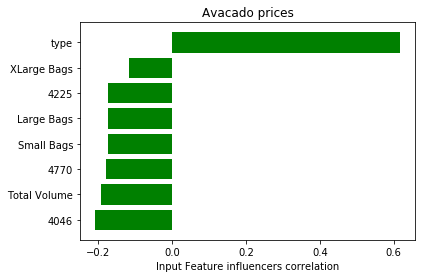

In [13]:
names=['Total Volume', '4046', '4225', '4770',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type']
plt.title('Avacado prices')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Input Feature influencers correlation')
plt.show()

In [14]:
from sklearn.feature_selection import mutual_info_regression

In [15]:
y=dataset['AveragePrice']

In [16]:
mi= mutual_info_regression(X,y)

In [17]:
mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)

Total Volume    0.321693
4046            0.299059
type            0.254679
4225            0.252071
Small Bags      0.237953
4770            0.224201
Large Bags      0.189273
XLarge Bags     0.116512
dtype: float64

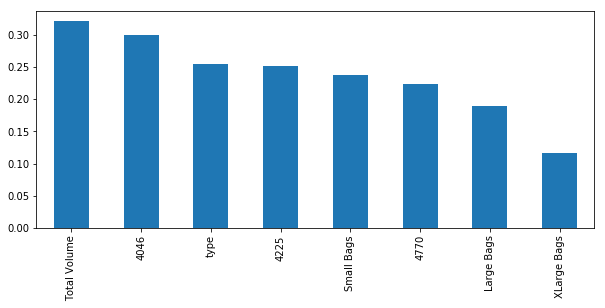

In [18]:
mi.sort_values(ascending=False).plot.bar(figsize=(10, 4))

In [55]:
X= dataset[['Date','Total Volume', '4046', '4225', '4770',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type']]
y= dataset.iloc[:,1]

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

In [57]:
X_train.head(2)

Date  Total Volume        4046       4225      4770  Small Bags  \
655   5/24/2015     657593.22   198187.29  369924.19  18817.60    50060.32   
1848  6/14/2015    1974806.07  1117926.72  443241.80  27161.21   375290.39   

      Large Bags  XLarge Bags  type  
655     20603.82         0.00     0  
1848     9693.84      1492.11     0

In [66]:
train_dataset= pd.DataFrame()
train_dataset['ds'] = pd.to_datetime(X["Date"])
train_dataset['y']=y
train_dataset.head(2)

ds     y
0 2015-12-27  1.33
1 2015-12-20  1.35

In [67]:
prophet_basic = Prophet()
prophet_basic.fit(train_dataset)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\khandelwalr\AppData\Local\Continuum\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [70]:
future= prophet_basic.make_future_dataframe(periods=300)
future.tail(2)

ds
18547 2019-01-18
18548 2019-01-19

In [34]:
forecast=prophet_basic.predict(future)

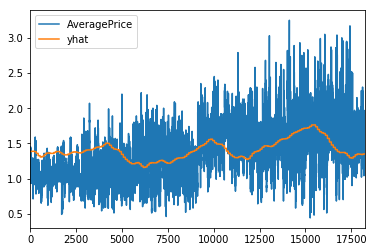

In [71]:
dataset['yhat'] = forecast['yhat']
dataset['AveragePrice'].plot(legend=True)
dataset['yhat'].plot(legend= True)


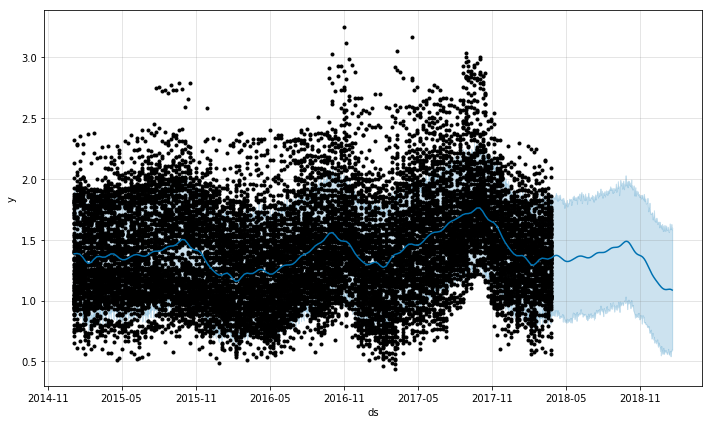

In [38]:
fig1 =prophet_basic.plot(forecast)


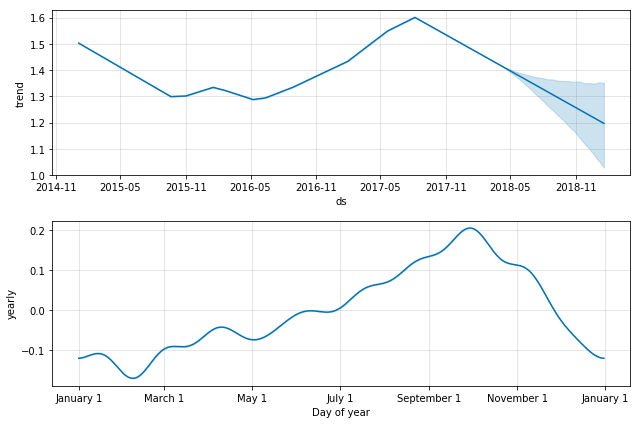

In [72]:
# to view  the forecast components
fig1 = prophet_basic.plot_components(forecast)

__By default, Prophet adds 25 changepoints into the initial 80% of the data-set. The number of changepoints can be set by using the n_changepoints parameter when initializing prophet (e.g., model=Prophet(n_changepoints=30)__

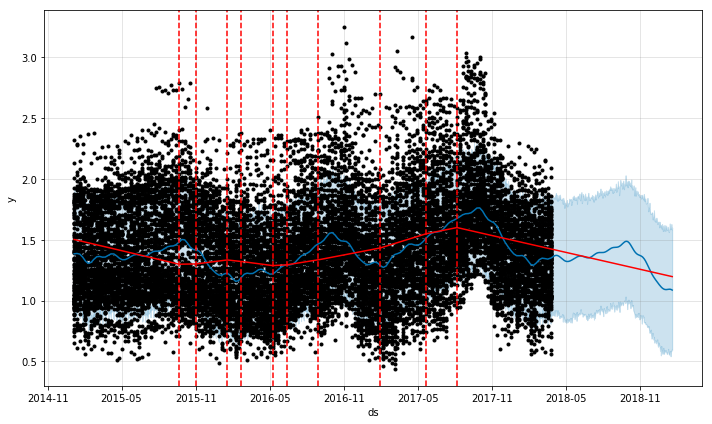

In [73]:
#Change points
#Prophet detects changepoints by first specifying a large number of potential changepoints at which the rate is allowed to change
from fbprophet.plot import add_changepoints_to_plot
fig = prophet_basic.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet_basic, forecast)

In [41]:
prophet_basic.changepoints

584     2015-02-08
1168    2015-03-15
1752    2015-04-26
2336    2015-05-31
2920    2015-07-12
3504    2015-08-16
4087    2015-09-20
4671    2015-11-01
5255    2015-12-06
5839    2016-01-17
6423    2016-02-21
7007    2016-03-27
7591    2016-05-08
8175    2016-06-12
8759    2016-07-24
9343    2016-08-28
9927    2016-10-02
10511   2016-11-13
11094   2016-12-18
11678   2017-01-29
12262   2017-03-05
12846   2017-04-09
13430   2017-05-21
14014   2017-06-25
14598   2017-08-06
Name: ds, dtype: datetime64[ns]

__Prophet will also let us take a look at the magnitudes of these possible changepoints__

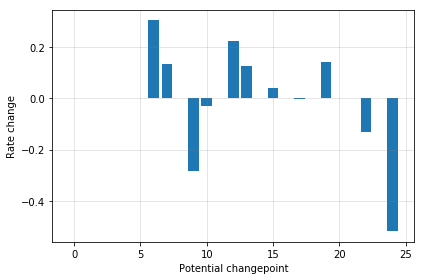

In [43]:
deltas = prophet_basic.params['delta'].mean(0)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111)
ax.bar(range(len(deltas)), deltas)
ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
ax.set_ylabel('Rate change')
ax.set_xlabel('Potential changepoint')
fig.tight_layout()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\khandelwalr\AppData\Local\Continuum\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



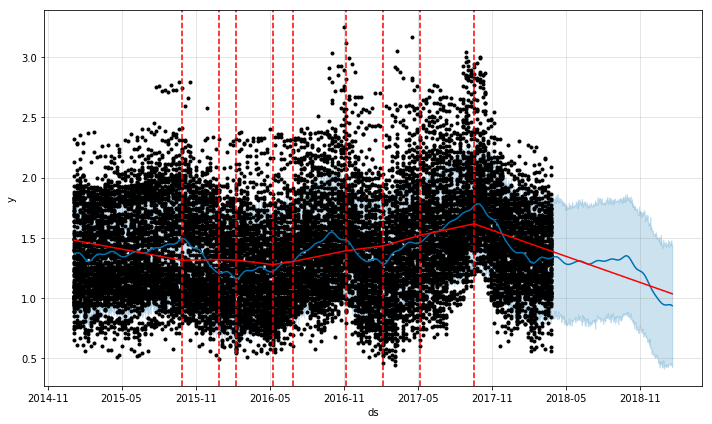

In [78]:
pro_change= Prophet(changepoint_range=0.95, yearly_seasonality=True)
forecast = pro_change.fit(train_dataset).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\khandelwalr\AppData\Local\Continuum\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



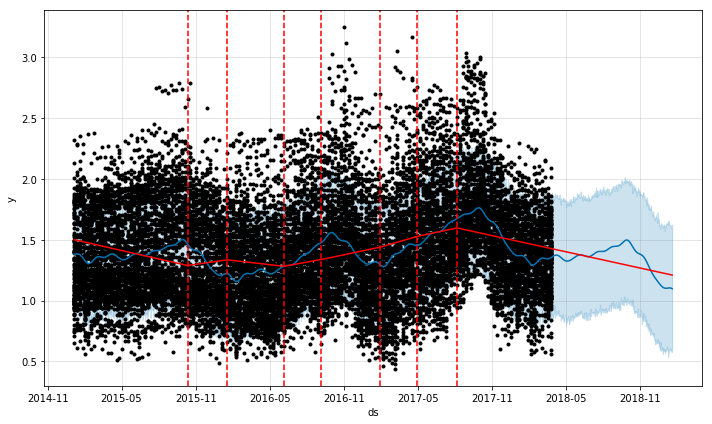

In [81]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True)
forecast = pro_change.fit(train_dataset).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\khandelwalr\AppData\Local\Continuum\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



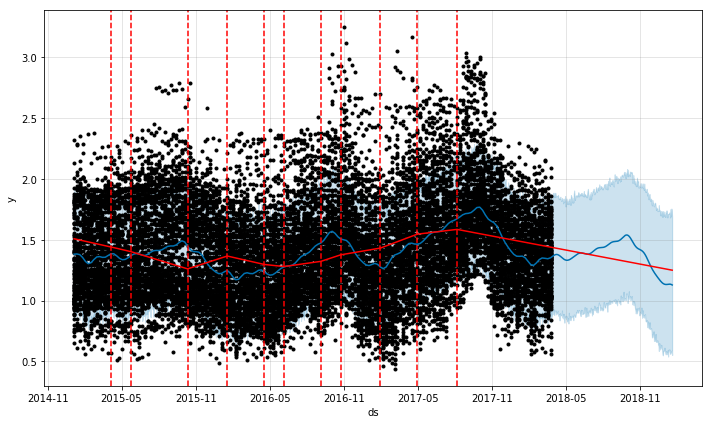

In [82]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.08)
forecast = pro_change.fit(train_dataset).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\khandelwalr\AppData\Local\Continuum\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



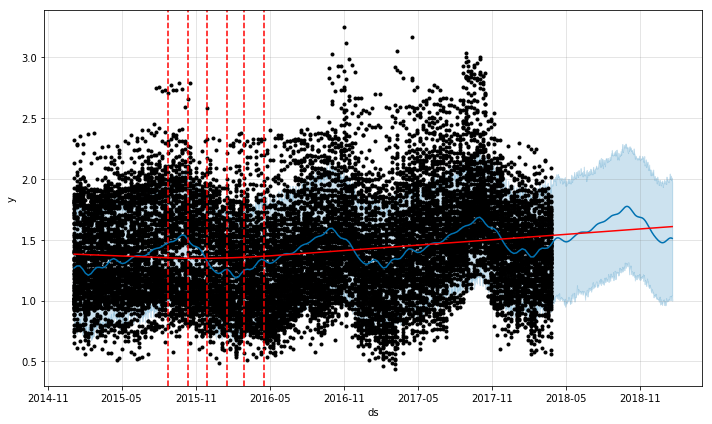

In [83]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.001)
forecast = pro_change.fit(train_dataset).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

In [ ]:
pro1 = Prophet(changepoints=['2009-02-18', '2011-03-20', '2012-07-08', '2013-02-25',
               '2015-09-23', '2016-06-22'])
forecast = pro1.fit(dataset_for_prediction).predict(future)
pro1.plot(forecast);


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\khandelwalr\AppData\Local\Continuum\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



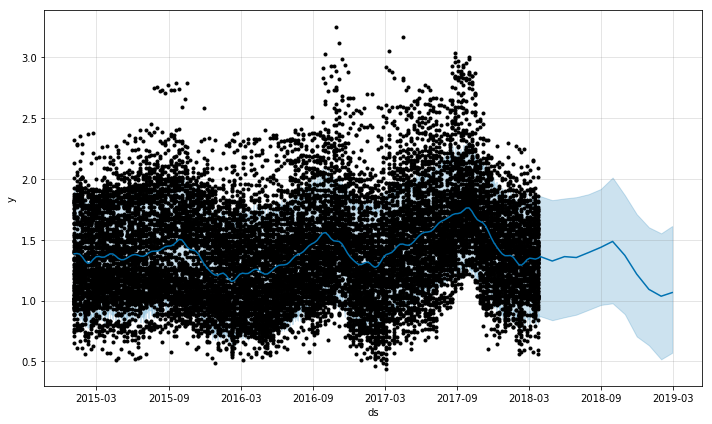

In [44]:
#create 12 months of future data
pro1= Prophet()
pro1.fit(dataset_for_prediction)
future_data = pro1.make_future_dataframe(periods=12, freq = 'm')
 
#forecast the data for future data
forecast_data = pro1.predict(future_data)
pro1.plot(forecast_data);

If the trend changes are being overfit (too much flexibility) or underfit (not enough flexibility), you can adjust the strength of the sparse prior using the input argument changepoint_prior_scale. By default, this parameter is set to 0.05. Increasing it will make the trend more flexible:

In [ ]:
pro_trend = Prophet(changepoint_prior_scale=0.5)
forecast = pro_trend.fit(dataset_for_prediction).predict(future)
fig = pro_trend.plot(forecast)

In [89]:
avocado_season = pd.DataFrame({
  'holiday': 'avocado season',
  'ds': pd.to_datetime(['2014-07-31', '2014-09-16', 
                        '2015-07-31', '2015-09-16',
                        '2016-07-31', '2016-09-16',
                        '2017-07-31', '2017-09-16',
                       '2018-07-31', '2018-09-16',
                        '2019-07-31', '2019-09-16']),
  'lower_window': -1,
  'upper_window': 0,
})

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\khandelwalr\AppData\Local\Continuum\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



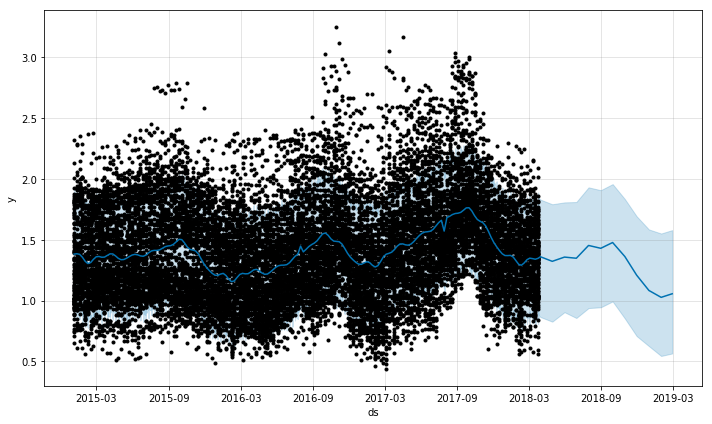

In [90]:
pro_holiday= Prophet(holidays=avocado_season)
pro_holiday.fit(train_dataset)
future_data = pro_holiday.make_future_dataframe(periods=12, freq = 'm')
 
#forecast the data for future data
forecast_data = pro_holiday.predict(future_data)
pro_holiday.plot(forecast_data);

In [93]:
train_dataset['type'] = X['type']
train_dataset['Total Volume'] = X['Total Volume']
train_dataset['4046'] = X['4046']
train_dataset['4225'] = X['4225']
train_dataset['4770'] = X['4770']
train_dataset['Small Bags'] = X['Small Bags']

In [98]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 8 columns):
ds              18000 non-null datetime64[ns]
y               18000 non-null float64
type            18000 non-null int64
Total Volume    18000 non-null float64
4046            18000 non-null float64
4225            18000 non-null float64
4770            18000 non-null float64
Small Bags      18000 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 1.1 MB


In [95]:
train_X= train_dataset[:18000]
test_X= train_dataset[18000:]

In [100]:
#Additional Regressor
pro_regressor= Prophet()
pro_regressor.add_regressor('type')
pro_regressor.add_regressor('Total Volume')
pro_regressor.add_regressor('4046')
pro_regressor.add_regressor('4225')
pro_regressor.add_regressor('4770')
pro_regressor.add_regressor('Small Bags')

#Fitting the data
pro_regressor.fit(train_X)
future_data = pro_regressor.make_future_dataframe(periods=249)


#forecast the data for Test  data
forecast_data = pro_regressor.predict(test_X)
pro_regressor.plot(forecast_data);


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\khandelwalr\AppData\Local\Continuum\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



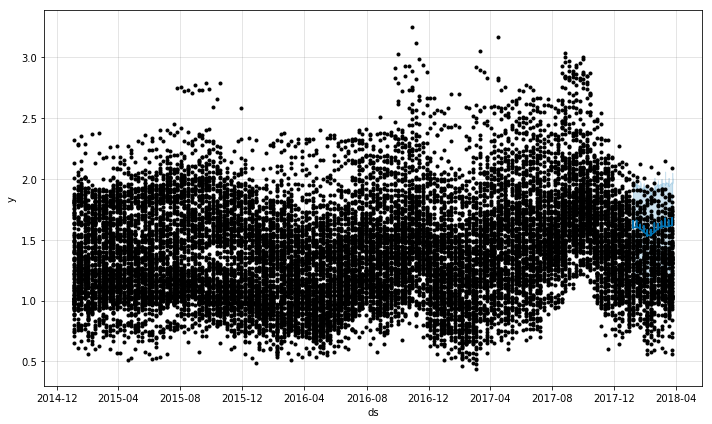

In [ ]:
future_data

In [92]:
X.columns

Index(['Date', 'Total Volume', '4046', '4225', '4770', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type'],
      dtype='object')